<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/5_Logistic_Regression_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-  1.1. Logistic Function (aka, Sigmoid Function) :  
$$P(y=1|X) = \frac{1}{1+e^{-z}}$$


$$\text where $$

$$ z = \beta_0 + \beta_1X$$

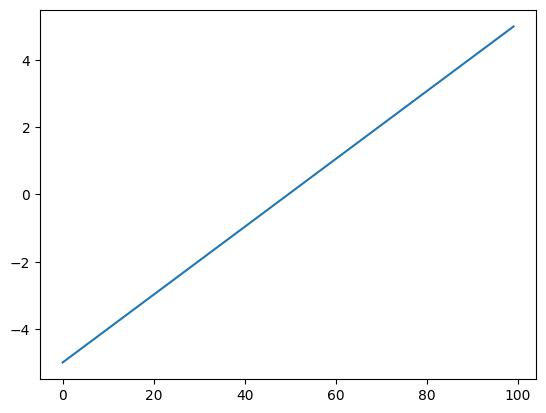

In [9]:
z = np.linspace(-5,5,100)
plt.plot(z)

$z = \beta_1 x + \beta_0$

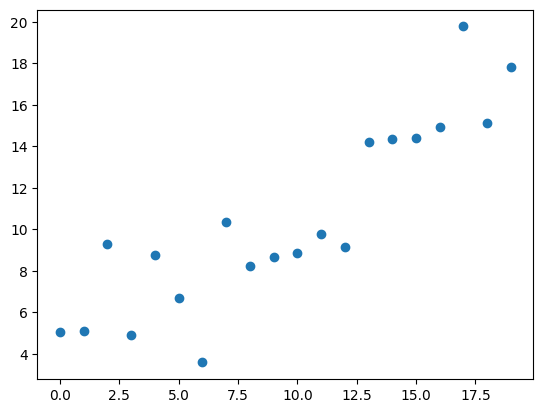

In [43]:
plt.scatter(range(0,20), np.random.randn(20)*3+range(0,20))

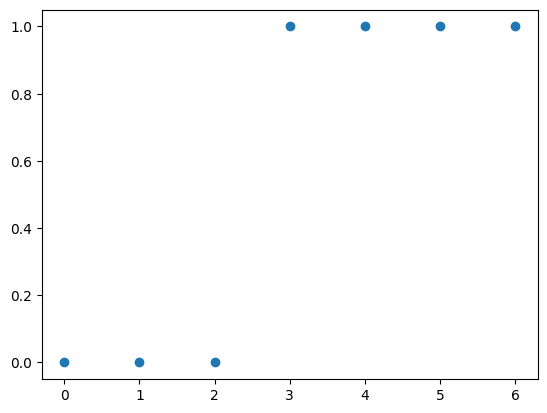

In [38]:
plt.scatter(range(0,7),[0]*3+[1]+[1]*3)

$z= \beta_1 x + \beta_0 $

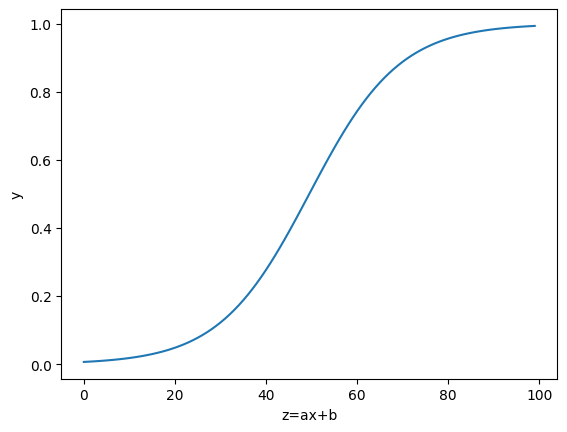

In [51]:
plt.plot(1/(1+np.exp(-z)))
plt.xlabel("z=ax+b")
plt.ylabel('y');

In [53]:
np.exp(0.5)

1.6487212707001282

## 2 Import Dataset, titanic

In [54]:
# prompt: get titanic dataset from sns
data=pd.read_csv("https://raw.githubusercontent.com/kjmobile/data/main/ml/titanic.csv")

In [55]:
data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1


## 3 Checking titanic

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [57]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


<Axes: >

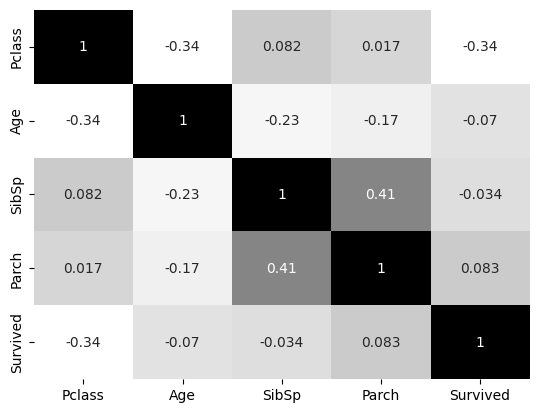

In [68]:
sns.heatmap(data.corr(numeric_only=True), cmap='Greys', linecolor='w', annot=True, cbar=0)

## 4 Preprocessing: Converting Categorical Variables (Dummy Variables and One-Hot Encoding)

In [69]:
data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1


In [70]:
titanic = data.drop(['Name','Ticket'], axis=1)
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [ ]:
# We use dummy coding (instead of one hot encoding this time by setting drop_first=True)
titanic_dum=pd.get_dummies(titanic, columns = ['Sex','Embarked'], drop_first=True)


In [ ]:
titanic_dum

## 5 Modeling and Predicting

In [ ]:
from sklearn.model_selection import train_test_split

X = titanic_dum.drop('Survived', axis = 1)
y = titanic_dum['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr.fit?

In [ ]:
X_train.head(2)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
# Predict category
pred = lr.predict(X_test)

In [ ]:
# to obtain actual probablities
lr.predict_proba(X_test)

## 6 Evaluating Prediction Models

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

In [ ]:
pd.Series(lr.coef_[0], index = X.columns)

## 7 Apply some Feature Engineering

In [ ]:
titanic_dum.columns

In [ ]:
titanic_dum['family'] = titanic_dum['SibSp'] + titanic_dum['Parch'] # sibling & spouse + Parent & child

In [ ]:
titanic_dum.head()

In [ ]:
# Dose the prediction accuracy improved by 'engineering' "family variable?"
X = titanic_dum.drop(['Survived','SibSp','Parch'], axis = 1)
y = titanic_dum['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy_score(y_test, pred)

In [ ]:
# visualize the predicted performance: pink (false positive) and black (fasle nagative) bars represents incorrect prediction

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 1))

plt.bar(range(len(y_test)), y_test+1, label='actual+1', color='black')
plt.bar(range(len(pred)), (pred+1), label='pred+1', color='red', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of pred vs actual (y_test)')
plt.legend(ncol=3, loc=(0,1.01))
plt.show()
